In [2]:
import pandas as pd
from google.colab import files

file = files.upload()
data = pd.read_csv('melb_data.csv')

Saving melb_data.csv to melb_data.csv


**Exploratory Data Analysis**

In [3]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

**MISSING VALUES**

In [7]:
missing_column = data.isnull().sum()
missing_column

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [8]:
data.isnull().mean() * 100

,0
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Price,0.000000
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.000000
Postcode,0.000000


There are significant percentages in the "BuildingArea" column (47%) and "YearBuilt" column 39%. Smaller percentages in the "Car" column 4% and "CouncilArea" column 10%.

And if you look more closely, there is a column that has a unique value, namely the "address" column, which if encoded will cause overfitting

In [9]:
cols_to_drop= ['Address','Price']

**HANDLE MISSING VALUES**

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=cols_to_drop)
y = data.Price

TrainX,ValX,TrainY,ValY = train_test_split(X,y,
                                           random_state=42,
                                           test_size=0.2)

numeric_features = TrainX.select_dtypes(include=['int64','float64']).columns
categorical_features = TrainX.select_dtypes(include=['object']).columns

**PREPROCESSING PIPELINE**

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


numeric_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

categorical_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('OneHot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [56]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transform,numeric_features),
        ('cat',categorical_transform,categorical_features)
    ]
)

In [17]:
TrainXNew = preprocessor.fit_transform(TrainX)
ValXNew = preprocessor.transform(ValX)

**MUTUAL INFORMATION**

In [20]:
TrainXMI = preprocessor.fit_transform(TrainX)

feature_name_num = numeric_features
feature_name_cat =(
    preprocessor
    .named_transformers_['cat']
    .named_steps['OneHot']
    .get_feature_names_out(categorical_features)
)

features_names = list(feature_name_num) + list(feature_name_cat)

In [22]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

mi_scores = mutual_info_regression(
  TrainXMI, TrainY, random_state=42
)

mi_series = pd.Series(mi_scores, index=features_names)
mi_series = mi_series.sort_values(ascending=False)

mi_series

,0
Propertycount,0.394322
Postcode,0.369847
Distance,0.276406
Rooms,0.232192
Bedroom2,0.213567
...,...
Suburb_Seaholme,0.000000
Date_8/10/2016,0.000000
Date_6/08/2016,0.000000
Suburb_Beaconsfield,0.000000


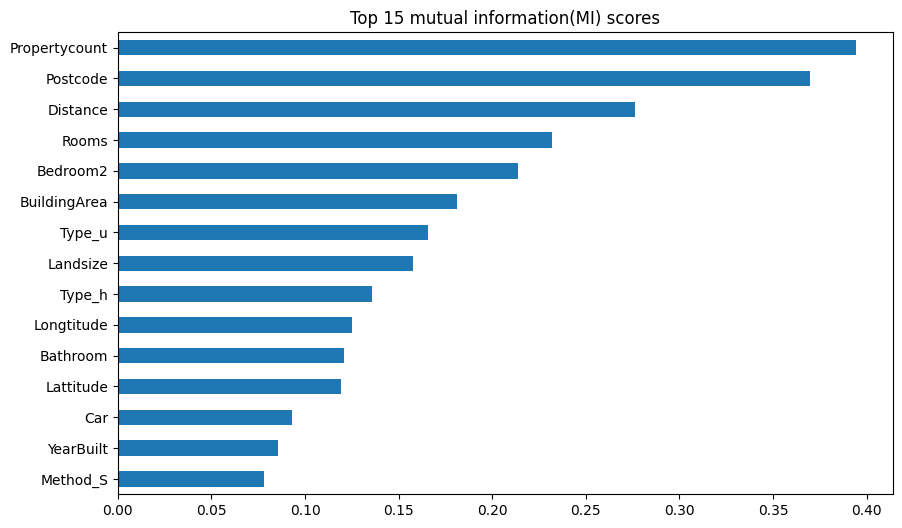

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
mi_series.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 mutual information(MI) scores")
plt.show()

**BASELINE MODEL**

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

linreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [26]:
from sklearn.model_selection import cross_val_score
import numpy as np

rmse_scores = -cross_val_score(
    linreg_model,TrainX,TrainY,
    scoring = 'neg_root_mean_squared_error',
    cv=5
)

print("Linear Regression RMSE:")
print("Mean:", rmse_scores.mean())
print("STD:", rmse_scores.std())

Linear Regression RMSE:
Mean: 410024.02484085766
STD: 54391.56908901036


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200, random_state=42,n_jobs=-1
    ))
])

Because the random forest model is better than the linear regression model, we will choose the random forest model and after that we will find out what features the random forest uses in making predictions.

In [29]:
rf_rmse = -cross_val_score(
    rf_model, TrainX,TrainY,
    scoring='neg_root_mean_squared_error',
    cv=5,n_jobs=-1
)

In [31]:
print("RandomForestRMSE:")
print("Mean:", rf_rmse.mean())
print("STD:", rf_rmse.std())

RandomForestRMSE:
Mean: 294095.7944576531
STD: 26832.926873025368


In [32]:
from sklearn.metrics import mean_squared_error

rf_model.fit(TrainX,TrainY)
y_pred = rf_model.predict(ValX)

rmse_test = np.sqrt(mean_squared_error(ValY,y_pred))
print("test RMSE:", rmse_test)

test RMSE: 283784.61514912965


**FEATURE SELECTION(MODEL-BASED)**

In [36]:
import pandas as pd
rf_model.fit(TrainX,TrainY)

important_featuresRF = rf_model.named_steps['model'].feature_importances_


feature_names = (
    list(numeric_features) + list(
        rf_model.named_steps['preprocessor']
        .named_transformers_['cat']
        .named_steps['OneHot']
        .get_feature_names_out(categorical_features)
    )
)

featureImportant = pd.Series(important_featuresRF,index=feature_names).sort_values(
    ascending=False
)

featureImportant.head(15)


,0
Regionname_Southern Metropolitan,0.208582
Rooms,0.164436
Distance,0.132148
Type_u,0.088939
Landsize,0.076121
Longtitude,0.046653
BuildingArea,0.042202
Lattitude,0.029053
Bathroom,0.028195
YearBuilt,0.018890


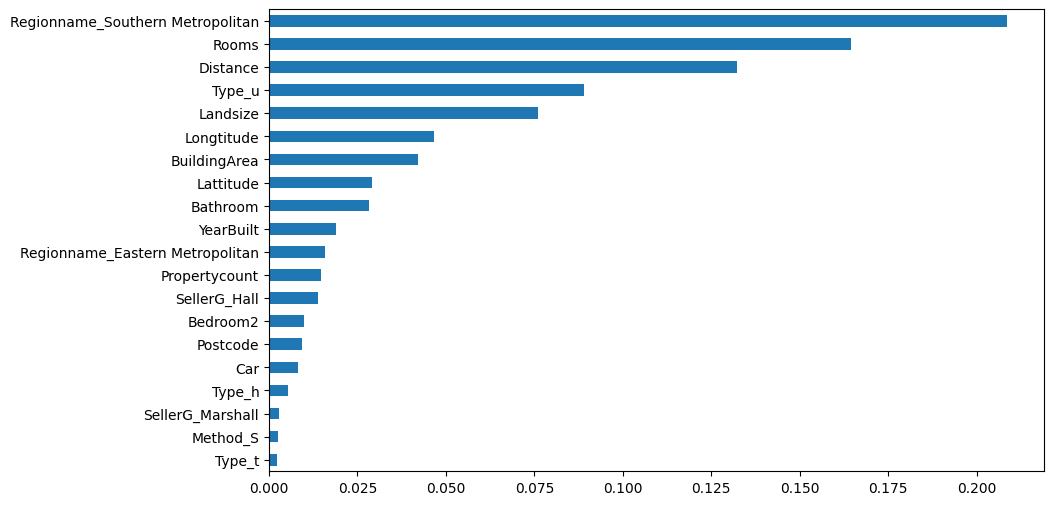

<Figure size 640x480 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
featureImportant.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.figure("Top 20 Feature Importances(RF)")
plt.show()

**HYPERPARAMETER TUNING(RF)**

In [39]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'model__n_estimators': [200, 400, 600],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']
}

In [40]:
rf_tuned = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_tuned.fit(TrainX,TrainY)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='ob...
                                              RandomForestRegressor(n_estimators=200,
                                                                    n_jobs=-1,
                                                                    random_state=42))]),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 20, 30],
                                        'model__max_features': ['sqrt', 'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [200, 400, 600]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [42]:
print("Best CV RMSE:", -rf_tuned.best_score_)
print("Best Parameter:",rf_tuned.best_params_)

Best CV RMSE: 326194.88032495824
Best Parameter: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': None}


In [45]:
from sklearn.metrics import mean_squared_error
best_rf = rf_tuned.best_estimator_

y_pred = best_rf.predict(ValX)
rmse_test = np.sqrt(mean_squared_error(ValY, y_pred))

print("Tuned RF test RMSE:", rmse_test)


Tuned RF test RMSE: 300115.4488018722


Tuning did not outperform the baseline model, therefore the baseline Random Forest was retained

**GRADIENT BOOSTING REGRESSOR**

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])


In [47]:
gbr_rmse = -cross_val_score(
    gbr_model,
    TrainX,TrainY,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)

print("GBR CV RMSE mean:", gbr_rmse.mean())
print("GBR CV RMSE std :", gbr_rmse.std())


GBR CV RMSE mean: 306262.9143842035
GBR CV RMSE std : 22802.63857419


gradient boosting did not outperform the baseline model, therefore the baseline Random Forest was retained

**HistGradientBoostingRegressor**

In [57]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', HistGradientBoostingRegressor(
        max_depth=8,
        learning_rate=0.05,
        max_iter=300,
        random_state=42
    ))
])


In [58]:
hgb_rmse = -cross_val_score(
    hgb_model,TrainX,TrainY,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)

print("HGB CV RMSE mean:", hgb_rmse.mean())
print("HGB CV RMSE std :", hgb_rmse.std())


HGB CV RMSE mean: 276831.8251098288
HGB CV RMSE std : 24650.097380016625


**Comparison of All Models**

1. LinearRegession = 410024.02484085766
2. Random Forest(baseline) = 294095.7944576531
3. Tuned Random Forest = 300115.4488018722
4. Gradient Boosting = 306262.9143842035
5. Hist Gradient Boosting = 276831.8251098288 (**BEST**)

**FINAL EVALUATION**

In [63]:
from sklearn.metrics import mean_squared_error

hgb_model.fit(TrainX, TrainY)

y_pred = hgb_model.predict(ValX)

rmse_test = np.sqrt(mean_squared_error(ValY, y_pred))
print("HGB Test RMSE:", rmse_test)


HGB Test RMSE: 253185.48946875168


Among all evaluated models, HistGradientBoostingRegressor achieved the lowest cross-validated RMSE and was selected as the final model

**MODEL INFERENCE**

In [64]:
final_model = hgb_model
final_model.fit(TrainX, TrainY)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object'))])),
                ('model',
                 HistGradientBoostingRegressor(learning_rate=0.05, max_depth=8,
                                               max_iter=300,
                                               random_state=42))])

1. **Load Final Model**

In [65]:
import joblib

joblib.dump(final_model,"melbourne_house_price_model.pkl")

['melbourne_house_price_model.pkl']

2. **User Simulation**

In [ ]:
new_house = {
    "Rooms": 3,
    "Distance": 8.5,
    "Landsize": 420,
    "BuildingArea": 160,
    "YearBuilt": 2005,
    "Bathroom": 2,
    "Car": 1,
    "Type": "h",
    "Regionname": "Southern Metropolitan",
    "Latitude": -37.85,
    "Longitude": 144.98,
    "Propertycount": 4000
}


3. **Utility Function for Inference**

In [80]:
def predict_house_price(model, house_dict, reference_columns):
    df = pd.DataFrame(columns=reference_columns)
    df.loc[0] = house_dict


    missing_cols = set(reference_columns) - set(df.columns)
    if missing_cols:
        raise ValueError(f"Missing columns: {missing_cols}")

    return model.predict(df)[0]

4. **Run Inference**

In [81]:
predicted_price = predict_house_price(
    model=loaded_model,
    house_dict=new_house,
    reference_columns=TrainX.columns
)

print(f"Predicted House Price: AUD {predicted_price:,.0f}")

Predicted House Price: AUD 1,608,978


The trained HistGradientBoostingRegressor pipeline was saved and reused to demonstrate inference on unseen housing data.
This example simulates a real-world scenario where a user provides property information and the model automatically predicts the house price.